In [23]:
!pip install ISLP
from ISLP import load_data
boston = load_data('Boston')

In [25]:
boston.info()
print("\nRows (RangeIndex) represent individual instance of Boston housing data.")
print("Columns (Data columns) represent features describing each instance.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB

Rows (RangeIndex) represent individual instance of Boston housing data.
Columns (Data columns) represent features describing each instance.


In [26]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [27]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


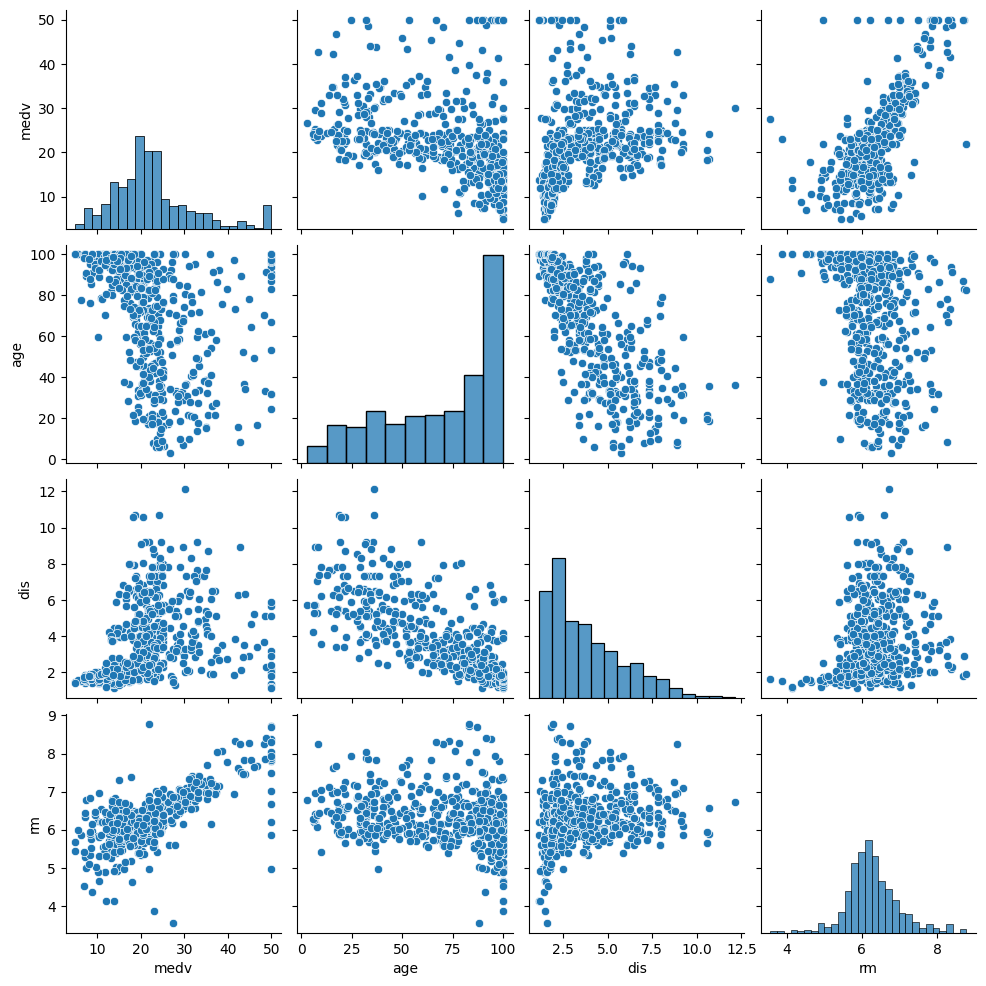

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

predictors = ['medv', 'age', 'dis', 'rm']

sns.pairplot(boston[predictors])
plt.show()



The findings suggest that
1. rm and medv are positively correlated
2. age and dis are negatively correlated

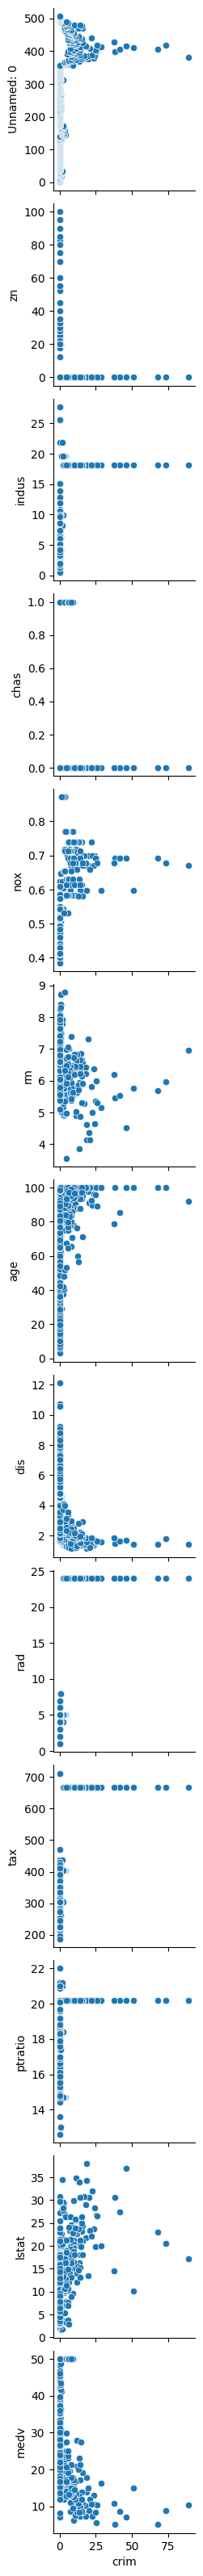

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(boston[boston.columns],x_vars=['crim'],y_vars=list(boston.columns.drop('crim')))
plt.show()


At a glance nothing appears to be significantly correlated with crime rate per capita. Perhaps 'lstat' or 'medv' shows some relationship, respectively slightly positive and negative, but too minor to draw conclusions from.

In [31]:
print("Suburbs with high crime rates:")
print(boston[boston.crim > boston.crim.quantile(0.95)])

print("\nSuburbs with high tax rates:")
print(boston[boston.tax > boston.tax.quantile(0.9)])

print("\nSuburbs with high pupil-teacher ratios:")
print(boston[boston.ptratio > boston.ptratio.quantile(0.9)])

for column in boston.columns:
  print("\nRange of predictor", column + ":")
  print("Minimum:", boston[column].min())
  print("Maximum:", boston[column].max())



Suburbs with high crime rates:
        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
374  18.4982  0.0   18.1     0  0.668  4.138  100.0  1.1370   24  666   
375  19.6091  0.0   18.1     0  0.671  7.313   97.9  1.3163   24  666   
378  23.6482  0.0   18.1     0  0.671  6.380   96.2  1.3861   24  666   
379  17.8667  0.0   18.1     0  0.671  6.223  100.0  1.3861   24  666   
380  88.9762  0.0   18.1     0  0.671  6.968   91.9  1.4165   24  666   
381  15.8744  0.0   18.1     0  0.671  6.545   99.1  1.5192   24  666   
384  20.0849  0.0   18.1     0  0.700  4.368   91.2  1.4395   24  666   
385  16.8118  0.0   18.1     0  0.700  5.277   98.1  1.4261   24  666   
386  24.3938  0.0   18.1     0  0.700  4.652  100.0  1.4672   24  666   
387  22.5971  0.0   18.1     0  0.700  5.000   89.5  1.5184   24  666   
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
400  25.0461  0.0   18.1     0  0.693  5.987  100.0  1.5888   24  666   
403  24.8017  0.0   

Some of the ranges can clearly be identified as a percentages / rates by their ranges such as zn, crim, chas.

In [32]:
num_suburbs_charles_river = boston[boston['chas'] == 1].shape[0]

print(num_suburbs_charles_river)


35


In [33]:
median_ptratio = boston['ptratio'].median()
print(f"The median pupil-teacher ratio is: {median_ptratio}")


The median pupil-teacher ratio is: 19.05


In [37]:
suburb_lowest_medv = boston.loc[boston['medv'].idxmin()]

print("Suburb with the lowest median value of owner-occupied homes:")
print(suburb_lowest_medv)

quantiles = boston.quantile([0.25, 0.5, 0.75])

for predictor in boston.columns:
  if predictor != 'medv':
    value = suburb_lowest_medv[predictor]
    print(f"\nPredictor: {predictor}")
    print(f"Value for the suburb with lowest medv: {value}")
    print(f"Overall quantiles: {quantiles[predictor].to_dict()}")

    if value <= quantiles[predictor][0.25]:
      print("This value is in the lower quartile of the overall distribution, indicating a relatively low value for this predictor.")
    elif value <= quantiles[predictor][0.5]:
      print("This value is between the lower quartile and median, indicating a moderate or below-average value.")
    elif value <= quantiles[predictor][0.75]:
      print("This value is between the median and the upper quartile, indicating a moderate or above-average value.")
    else:
      print("This value is in the upper quartile of the overall distribution, indicating a relatively high value.")





Suburb with the lowest median value of owner-occupied homes:
crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

Predictor: crim
Value for the suburb with lowest medv: 38.3518
Overall quantiles: {0.25: 0.08204499999999999, 0.5: 0.25651, 0.75: 3.6770825}
This value is in the upper quartile of the overall distribution, indicating a relatively high value.

Predictor: zn
Value for the suburb with lowest medv: 0.0
Overall quantiles: {0.25: 0.0, 0.5: 0.0, 0.75: 12.5}
This value is in the lower quartile of the overall distribution, indicating a relatively low value for this predictor.

Predictor: indus
Value for the suburb with lowest medv: 18.1
Overall quantiles: {0.25: 5.19, 0.5: 9.69, 0.75: 18.1}
This value is between the median and the upper quartile, indica

The suburb with the lowest median value of owner-occupied homes exhibits high crime rates, as indicated by a crime rate in the upper quartile of the overall distribution. It has zero zoning for residential land, reflecting a lack of open space for single-family homes. The industrial percentage is above average, suggesting a mixed-use area that might deter residential appeal. Pollution levels, measured by nitrogen oxides, are also high, falling in the upper quartile, which could affect livability. The average number of rooms per dwelling is below the median, indicating smaller living spaces. The age of homes is significantly high, suggesting older infrastructure. Accessibility, as indicated by the distance to employment centers, is poor, with a lower quartile value. Public transportation accessibility appears moderate based on the radial highway index, while tax rates and pupil-teacher ratios are both moderate to high, potentially impacting affordability and education quality. Lastly, the percentage of lower-status residents is notably high, reflecting socioeconomic challenges in the area.

In [42]:
more_than_7_rooms = boston[boston.rm > 7]
print(f"Number of suburbs with more than 7 rooms per dwelling: {more_than_7_rooms.shape[0]}")

more_than_8_rooms = boston[boston.rm > 8]
print(f"Number of suburbs with more than 8 rooms per dwelling: {more_than_8_rooms.shape[0]}")

print("\nSuburbs with more than 8 rooms per dwelling:")
print(more_than_8_rooms)


Number of suburbs with more than 7 rooms per dwelling: 64
Number of suburbs with more than 8 rooms per dwelling: 13

Suburbs with more than 8 rooms per dwelling:
        crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
97   0.12083   0.0   2.89     0  0.4450  8.069  76.0  3.4952    2  276   
163  1.51902   0.0  19.58     1  0.6050  8.375  93.9  2.1620    5  403   
204  0.02009  95.0   2.68     0  0.4161  8.034  31.9  5.1180    4  224   
224  0.31533   0.0   6.20     0  0.5040  8.266  78.3  2.8944    8  307   
225  0.52693   0.0   6.20     0  0.5040  8.725  83.0  2.8944    8  307   
226  0.38214   0.0   6.20     0  0.5040  8.040  86.5  3.2157    8  307   
232  0.57529   0.0   6.20     0  0.5070  8.337  73.3  3.8384    8  307   
233  0.33147   0.0   6.20     0  0.5070  8.247  70.4  3.6519    8  307   
253  0.36894  22.0   5.86     0  0.4310  8.259   8.4  8.9067    7  330   
257  0.61154  20.0   3.97     0  0.6470  8.704  86.9  1.8010    5  264   
262  0.52014  20.0   3.9

In [43]:
more_than_7_rooms.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.979109,28.171875,5.775625,0.125000,0.504455,7.570094,60.640625,4.199617,5.984375,312.234375,16.259375,5.474062,38.396875
std,2.807599,34.053089,5.544494,0.333333,0.092863,0.481467,27.858587,2.074423,5.655429,118.311365,2.351407,2.906582,8.722639
min,0.009060,0.000000,0.460000,0.000000,0.394000,7.007000,8.400000,1.202400,1.000000,193.000000,12.600000,1.730000,15.000000
25%,0.045023,0.000000,2.460000,0.000000,0.430250,7.183250,36.000000,2.444925,3.000000,244.750000,14.700000,3.555000,32.975000
50%,0.097860,20.000000,3.970000,0.000000,0.488000,7.414000,63.800000,3.495200,5.000000,273.000000,17.400000,4.775000,36.450000
75%,0.542893,45.000000,6.200000,0.000000,0.582500,7.858500,85.025000,5.462925,7.000000,329.000000,17.925000,6.590000,46.175000
max,19.609100,95.000000,19.580000,1.000000,0.718000,8.780000,100.000000,9.222900,24.000000,666.000000,20.200000,16.740000,50.000000


In [44]:
more_than_8_rooms.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000


A notable finding is that the max and mean of crime rate and lstat drops significantly in relation to a higher number of dwellings.